In [ ]:
# -------------------------
# EMPLOYEE ATTRITION MODEL
# -------------------------

import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load Data
df=pd.read_csv('/content/greendestination.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1045,40,No,Travel_Rarely,896,Research & Development,2,3,Medical,1,1474,...,3,80,1,8,3,4,3,1,1,2
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,...,4,80,1,24,4,3,22,6,5,17
1128,36,No,Travel_Frequently,1302,Research & Development,6,4,Life Sciences,1,1594,...,4,80,1,9,3,3,3,2,0,2
968,36,No,Travel_Frequently,607,Sales,7,3,Marketing,1,1362,...,4,80,1,17,2,2,15,7,6,13
1026,32,No,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,...,3,80,1,7,3,2,4,3,0,3


In [ ]:
# Drop unnecessary columns
df = df.drop(["EmployeeCount", "StandardHours", "EmployeeNumber", "Over18"], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Encode Categorical Columns

label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])


In [ ]:
# Define Features and Target

X = df.drop("Attrition", axis=1)
y = df["Attrition"]   # 1 = Yes, 0 = No

In [ ]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
# Train Model

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Evaluate Model

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8396739130434783

Confusion Matrix:
 [[300   9]
 [ 50   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.50      0.15      0.23        59

    accuracy                           0.84       368
   macro avg       0.68      0.56      0.57       368
weighted avg       0.80      0.84      0.80       368



In [ ]:
# Predict New Employee

new_employee = pd.DataFrame({
    "Age": [28],
    "BusinessTravel": [2],
    "DailyRate": [1200],
    "Department": [1],
    "DistanceFromHome": [15],
    "Education": [3],
    "EducationField": [1],
    "EnvironmentSatisfaction": [4],
    "Gender": [1],
    "HourlyRate": [65],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": [4],
    "JobSatisfaction": [3],
    "MaritalStatus": [1],
    "MonthlyIncome": [5500],
    "MonthlyRate": [20000],
    "NumCompaniesWorked": [2],
    "OverTime": [1],  # 1 = Yes, 0 = No
    "PercentSalaryHike": [12],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StockOptionLevel": [1],
    "TotalWorkingYears": [5],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [3],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [1],
    "YearsWithCurrManager": [2]
})

prediction = model.predict(new_employee)
print("\nWill the employee leave? →", "Yes" if prediction[0] == 1 else "No")


Will the employee leave? → No


In [ ]:
# ---------------------------
#   FEATURE IMPORTANCE
# ---------------------------
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp)


                     Feature  Importance
15             MonthlyIncome    0.074008
0                        Age    0.069729
2                  DailyRate    0.060459
23         TotalWorkingYears    0.058583
4           DistanceFromHome    0.051146
9                 HourlyRate    0.048142
16               MonthlyRate    0.045018
18                  OverTime    0.042740
26            YearsAtCompany    0.042466
29      YearsWithCurrManager    0.040358
17        NumCompaniesWorked    0.037015
19         PercentSalaryHike    0.034420
12                   JobRole    0.032240
7    EnvironmentSatisfaction    0.028968
25           WorkLifeBalance    0.028939
10            JobInvolvement    0.027967
24     TrainingTimesLastYear    0.027211
27        YearsInCurrentRole    0.026676
22          StockOptionLevel    0.026272
21  RelationshipSatisfaction    0.025184
13           JobSatisfaction    0.024986
14             MaritalStatus    0.023334
28   YearsSinceLastPromotion    0.023157
6             Ed

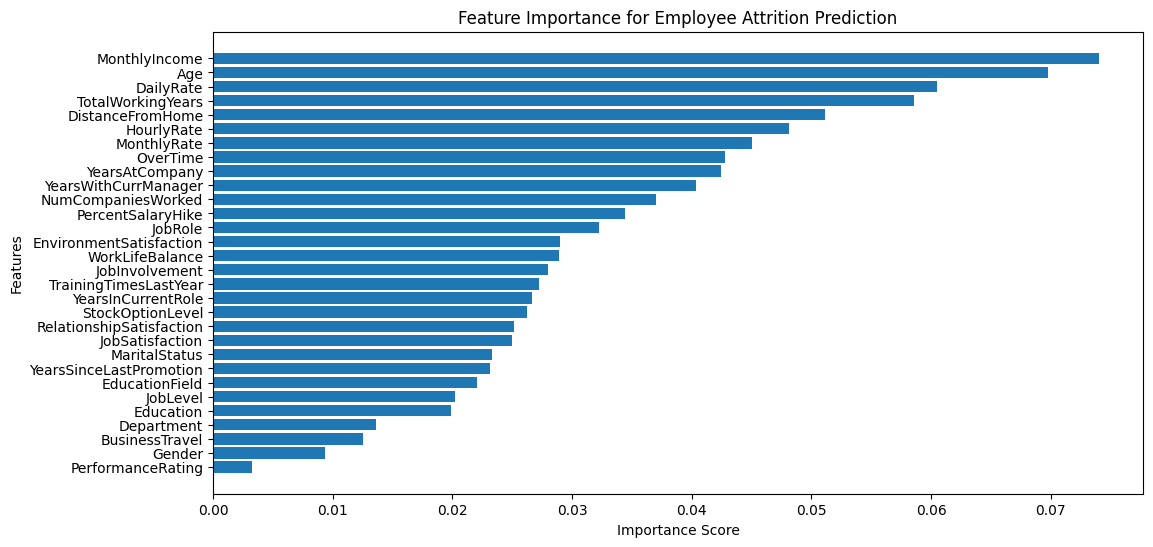

In [ ]:

# ---------------------------
#   PLOT FEATURE IMPORTANCE
# ---------------------------
plt.figure(figsize=(12, 6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Employee Attrition Prediction")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
corr_matrix = df.corr()

/tmp/ipython-input-2163964752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


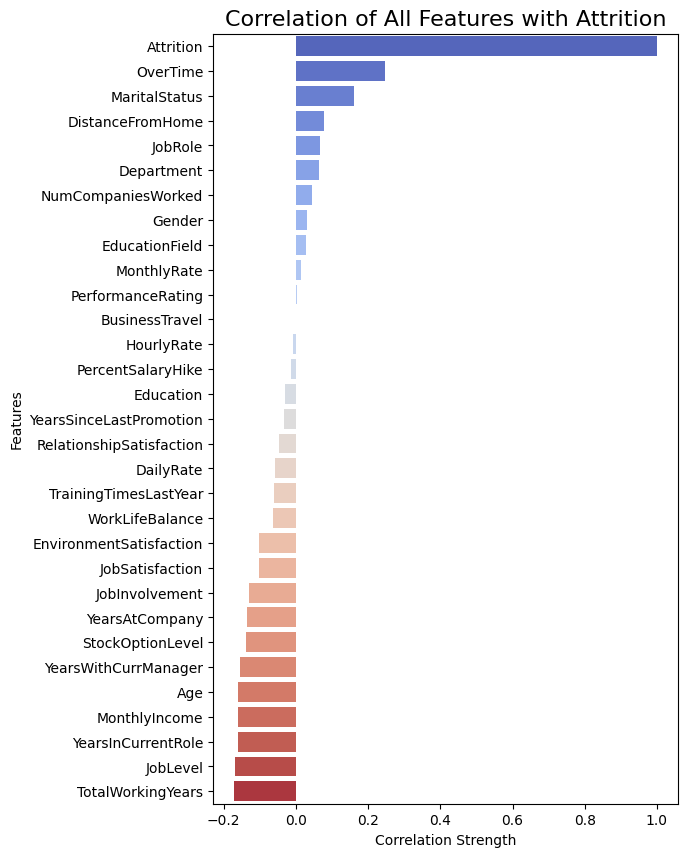

In [ ]:
# 6️⃣ Focused Correlation with Attrition Only
# This shows which features MOST influence attrition
# -------------------------------------------------------------
plt.figure(figsize=(6, 10))

# Sort correlations by strongest impact
attr_corr = corr_matrix["Attrition"].sort_values(ascending=False)

sns.barplot(
    x=attr_corr.values,
    y=attr_corr.index,
    palette="coolwarm"
)

plt.title("Correlation of All Features with Attrition", fontsize=16)
plt.xlabel("Correlation Strength")
plt.ylabel("Features")
plt.show()



In [ ]:
# -------------------------------------------------------------
# 7️⃣ Print Top 10 Positive / Negative Correlations
# Helps HR understand which factors push employees to leave
# -------------------------------------------------------------
print("\n🔹 Top POSITIVE correlations with Attrition (increases chance of leaving):")
print(attr_corr.head(10))

print("\n🔹 Top NEGATIVE correlations with Attrition (reduces chance of leaving):")
print(attr_corr.tail(10))


🔹 Top POSITIVE correlations with Attrition (increases chance of leaving):
Attrition             1.000000
OverTime              0.246118
MaritalStatus         0.162070
DistanceFromHome      0.077924
JobRole               0.067151
Department            0.063991
NumCompaniesWorked    0.043494
Gender                0.029453
EducationField        0.026846
MonthlyRate           0.015170
Name: Attrition, dtype: float64

🔹 Top NEGATIVE correlations with Attrition (reduces chance of leaving):
JobSatisfaction        -0.103481
JobInvolvement         -0.130016
YearsAtCompany         -0.134392
StockOptionLevel       -0.137145
YearsWithCurrManager   -0.156199
Age                    -0.159205
MonthlyIncome          -0.159840
YearsInCurrentRole     -0.160545
JobLevel               -0.169105
TotalWorkingYears      -0.171063
Name: Attrition, dtype: float64
